# Question 3: Object Identification

In [1]:
# Libraries
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


import histogram_module # functions for histograms
import gauss_module # functions for gaussian filters
import dist_module # functions for compute distances
import match_module # functions for finding matches
import rpc_module # functions for precision recall plots

import pandas as pd
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import ParameterGrid # useful in implementig the grid search

In [2]:
# Load data 

with open('model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

# Histogram and distance specifications

dist_type = 'intersect'
hist_type = 'rg'
num_bins = 30

## a)
Having implemented different distance functions and image histograms, we can now test how suitable
they are for retrieving images in query-by-example scenario. Implement a function find best match, in
match module.py, which takes a list of model images and a list of query images and for each query im-
age returns the index of closest model image. The function should take string parameters, which identify
distance function, histogram function and number of histogram bins. See comments in the beginning of
find best match for more details. Additionally to the indices of the best matching images your implemen-
tation should also return a matrix which contains distances between all pairs of model and query images.

In [3]:
## Find best match (Question 3.a)
[best_match, D] = match_module.find_best_match(model_images, query_images, dist_type, hist_type, num_bins)

In [4]:
print(D)

[[0.13824463 0.8727417  0.27679443 ... 0.90576172 0.91748047 0.91326904]
 [0.84545898 0.17010498 0.78546143 ... 0.2008667  0.52099609 0.51452637]
 [0.30749512 0.89318848 0.16094971 ... 0.90844727 0.93505859 0.83105469]
 ...
 [0.84399414 0.25469971 0.76928711 ... 0.17944336 0.65283203 0.64642334]
 [0.94573975 0.64825439 0.91320801 ... 0.63885498 0.2076416  0.47735596]
 [0.93481445 0.83624268 0.80603027 ... 0.85845947 0.93981934 0.71002197]]


In [5]:
print(best_match)

[0, 1, 2, 3, 4, 46, 6, 14, 8, 9, 10, 11, 12, 13, 14, 65, 16, 17, 18, 19, 32, 21, 22, 23, 24, 6, 26, 66, 28, 29, 30, 45, 32, 33, 46, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 69, 48, 49, 75, 51, 52, 43, 54, 55, 56, 57, 58, 59, 60, 65, 86, 51, 64, 77, 66, 67, 64, 69, 70, 71, 72, 31, 74, 75, 37, 77, 59, 31, 80, 81, 82, 83, 84, 65, 86, 87, 71]


# b) 
Implement a function show neighbors (in match module.py) which takes a list of model images and a list of
query images and for each query image visualizes several model images which are closest to the query image
according to the specified distance metric. Use the function find best match in your implementation.

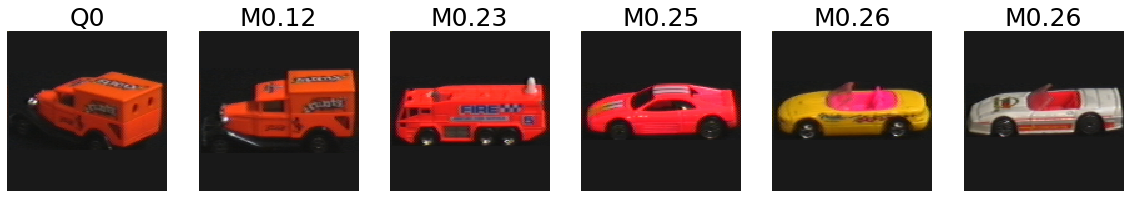

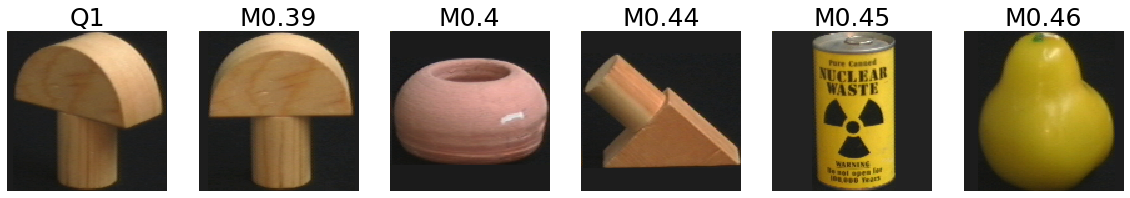

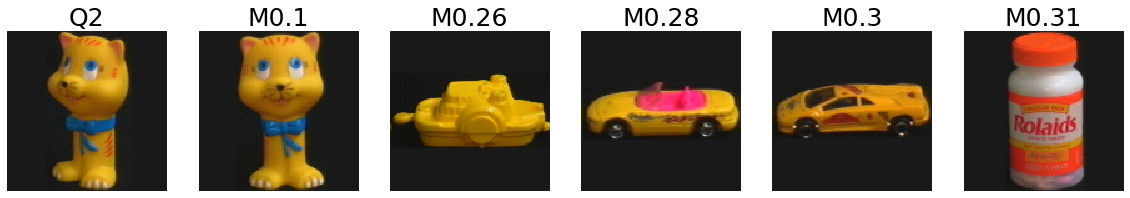

In [18]:
## visualize nearest neighbors (Question 3.b)
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
match_module.show_neighbors(model_images, query_images_vis, dist_type, hist_type, num_bins)

# c) 
Use the function find best match to compute recognition rate for different combinations of distance and
histogram functions. The recognition rate is given by a ratio between number of correct matches and total
number of query images. Experiment with different functions and numbers of histogram bins, try to find
combination that works best. Submit the summary of your experiments in a report as part of your solution.

In [7]:
## compute recognition percentage (Question 3.c)

num_correct = sum( np.array(best_match) == np.array(range(len(query_images))) )
print('number of correct matches: %d (%f)'% (num_correct, 1.0 * num_correct / len(query_images)))

number of correct matches: 66 (0.741573)


In [8]:
# Compute recognition rate using a function that can take also slices of query images 
# Using the same specification as before, we get same result

match_module.recognition_rate(model_images, query_images, query_images, dist_type, hist_type, num_bins)

0.7415730337078652

In [9]:
# Different combinations used for distance functions, histogram functions and number of bins
hyper_grid_cv = {'dist_type':['intersect', 'chi2', 'l2'], 'hist_type':['grayvalue', 'rgb', 'rg', 'dxdy'], 
                 'num_bins':[5, 10, 30, 50]}

# Find recognition rate for each combination
match_module.grid_search(hyper_grid_cv, model_images, query_images, query_images)

# Show results
rec_rate = pd.read_csv('recognition_rates.csv')
rec_rate.sort_values('recognition_rate', ascending=False)


File created grid_search


,hyperparameters,recognition_rate
6,"['intersect', 'rgb', 30]",0.808989
5,"['intersect', 'rgb', 10]",0.786517
7,"['intersect', 'rgb', 50]",0.786517
4,"['intersect', 'rgb', 5]",0.775281
10,"['intersect', 'rg', 30]",0.741573
11,"['intersect', 'rg', 50]",0.741573
8,"['intersect', 'rg', 5]",0.719101
15,"['intersect', 'dxdy', 50]",0.696629
14,"['intersect', 'dxdy', 30]",0.685393
9,"['intersect', 'rg', 10]",0.685393


# Question 4: Performance Evaluation (bonus of 10 points)


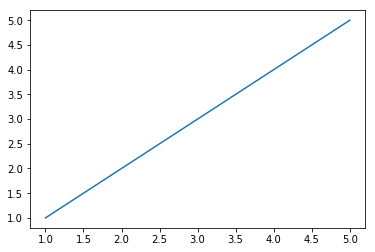

In [8]:
with open('model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

num_bins = 20


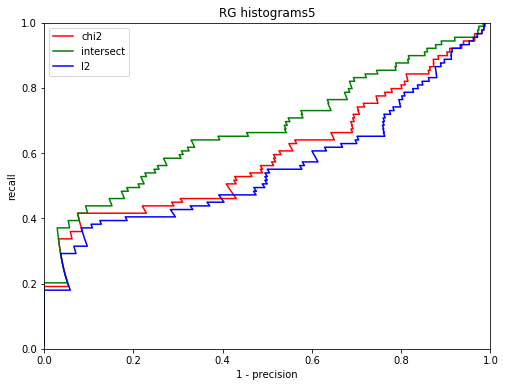

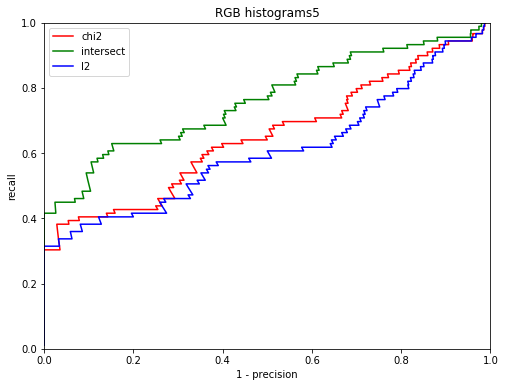

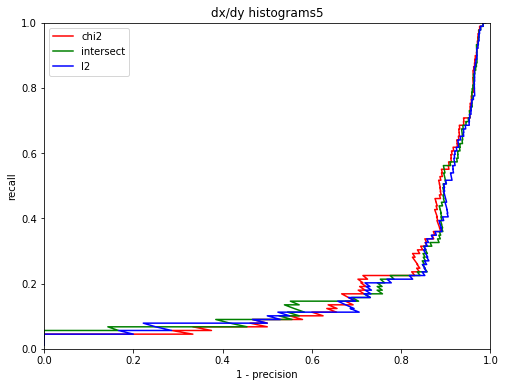

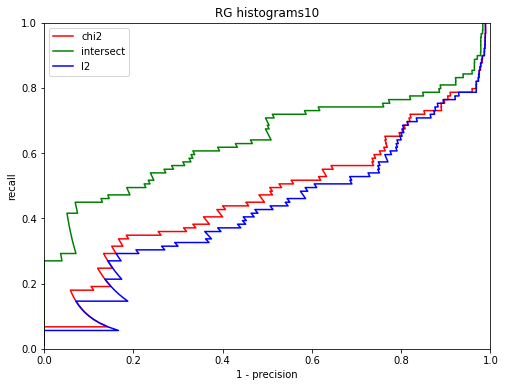

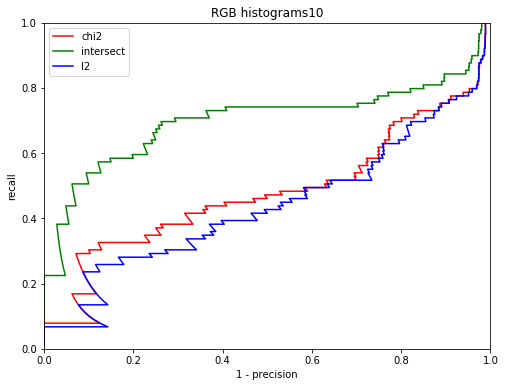

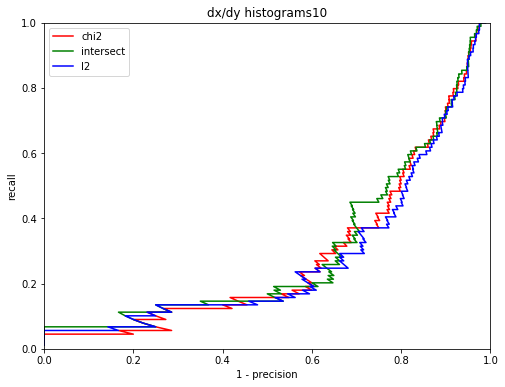

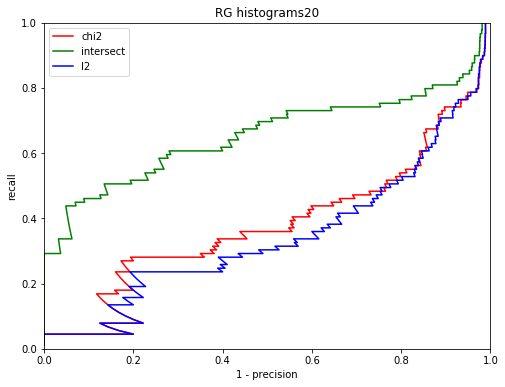

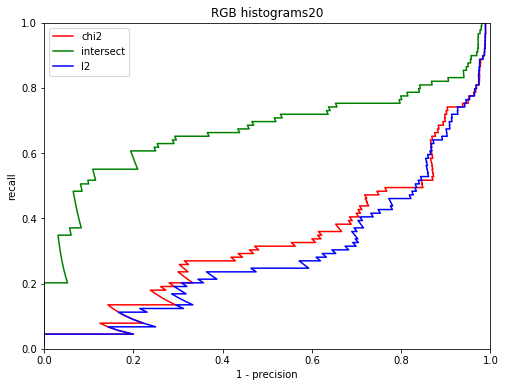

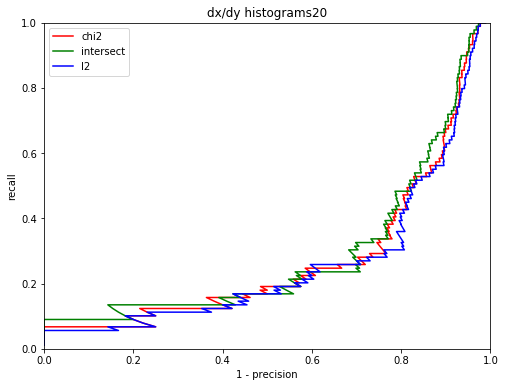

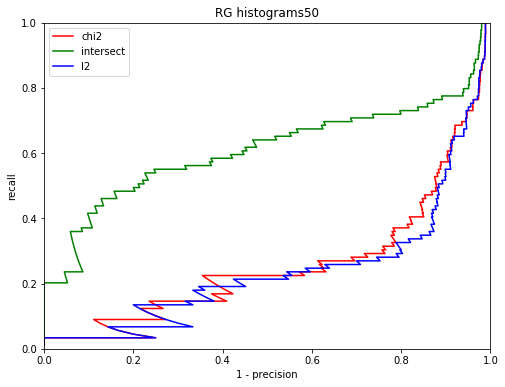

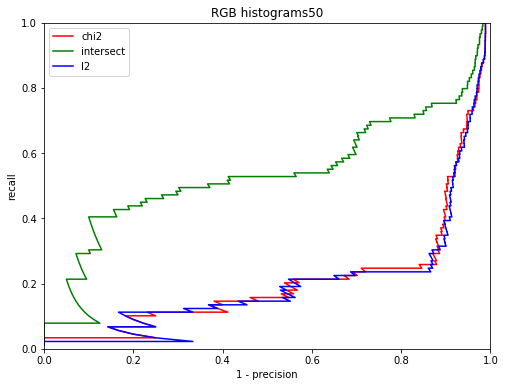

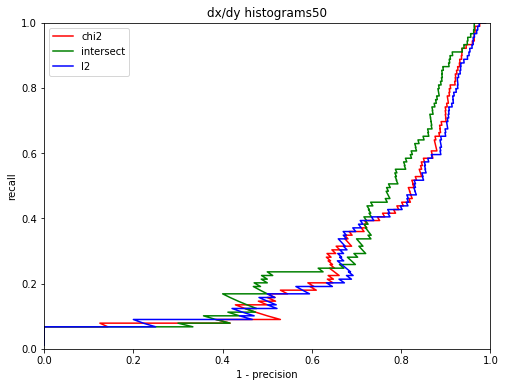

In [14]:
for num_bins in [5,10,20,50]:
    plt.figure(figsize=(8, 6))
    rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rg', num_bins, ['r', 'g', 'b'])
    plt.title('RG histograms'+str(num_bins))
    plt.savefig('.\plots\RG_histograms'+str(num_bins))

    plt.figure(figsize=(8, 6))
    rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rgb', num_bins, ['r', 'g', 'b'])
    plt.title('RGB histograms'+str(num_bins))
    plt.savefig('.\plots\RGB_histograms'+str(num_bins))


    plt.figure(figsize=(8, 6))
    rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'dxdy', num_bins, ['r', 'g', 'b'])
    plt.title('dx/dy histograms'+str(num_bins))
    plt.savefig('.\plots\dxdy_histograms'+str(num_bins))